Video: Q1_1 | Valence: -2, Arousal: 1


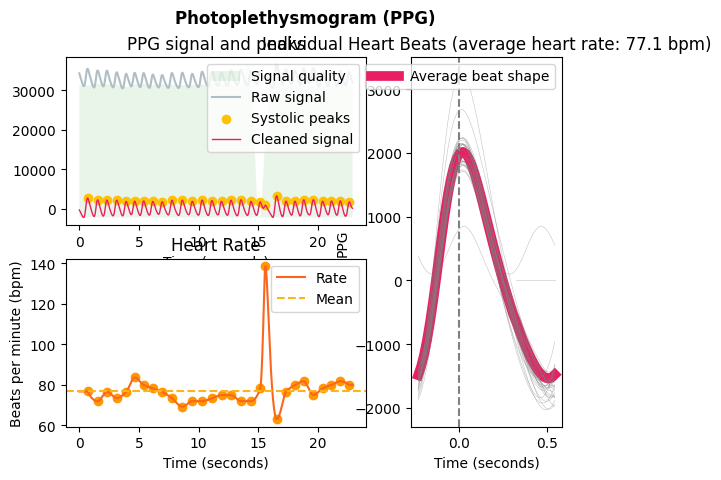

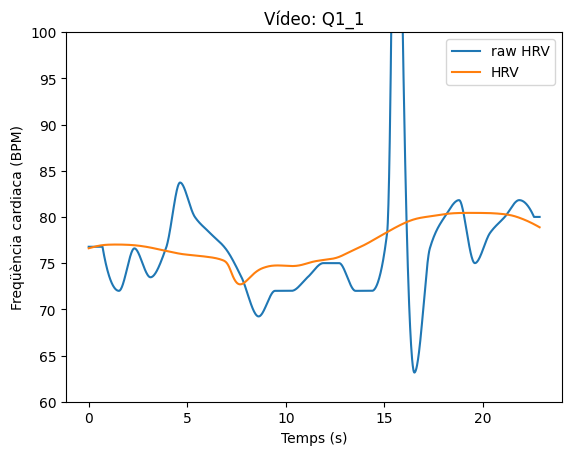

Video: Q1_2 | Valence: -2, Arousal: 2


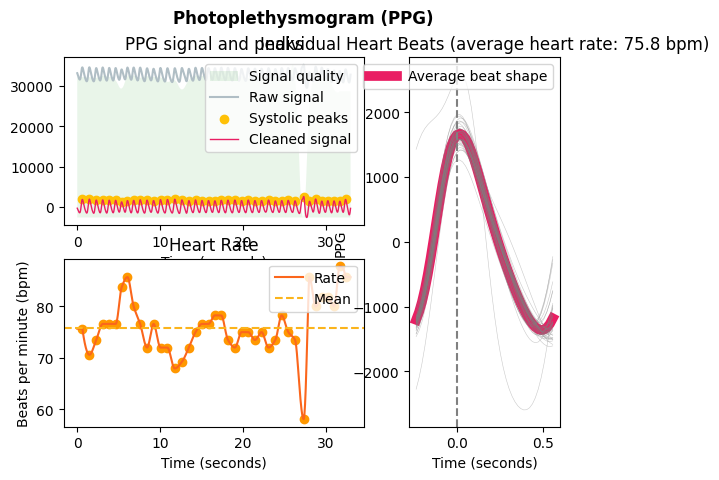

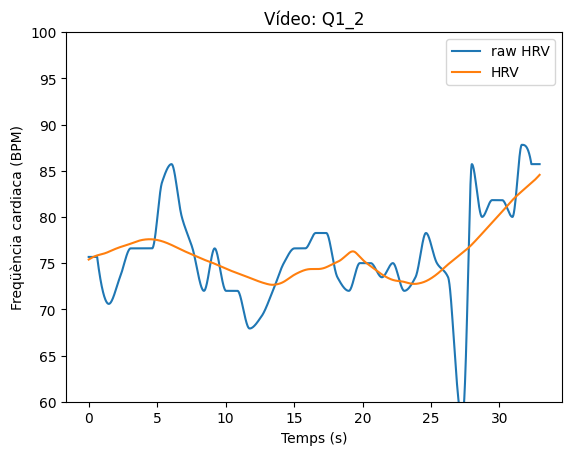

Video: Q2_1 | Valence: 1, Arousal: 1


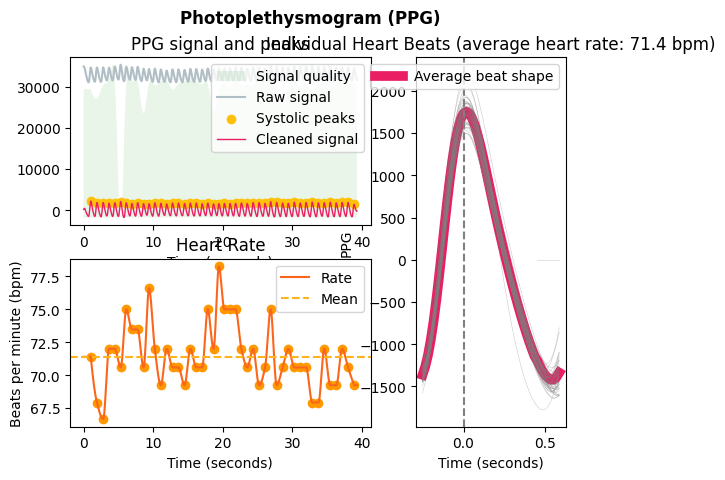

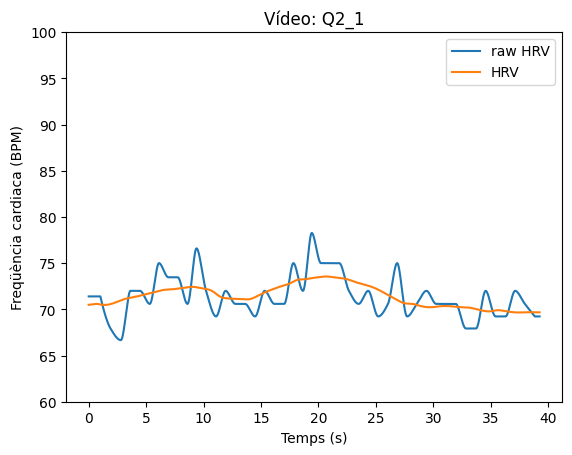

Video: Q2_2 | Valence: -1, Arousal: 2


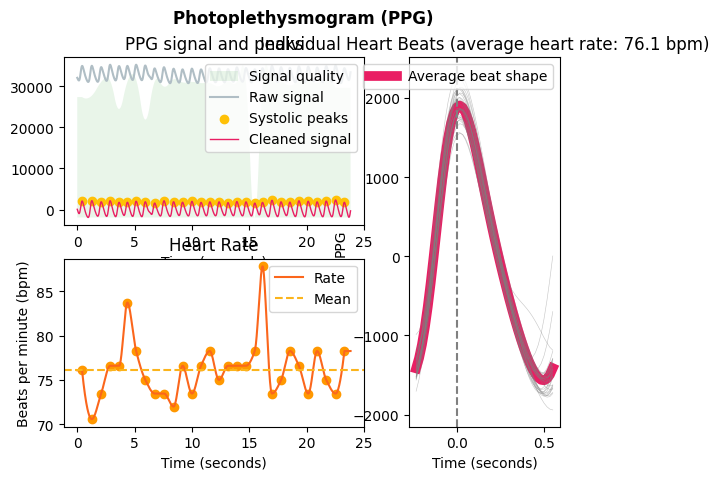

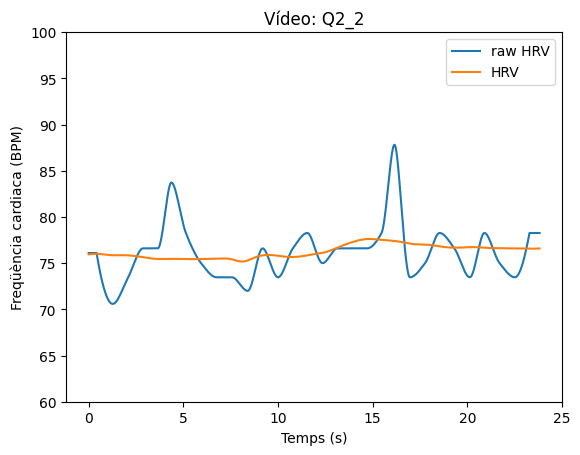

Video: Q3_1 | Valence: 1, Arousal: 0


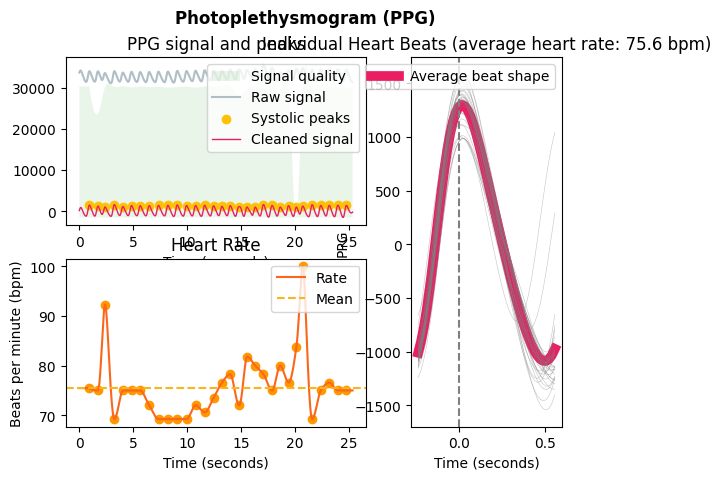

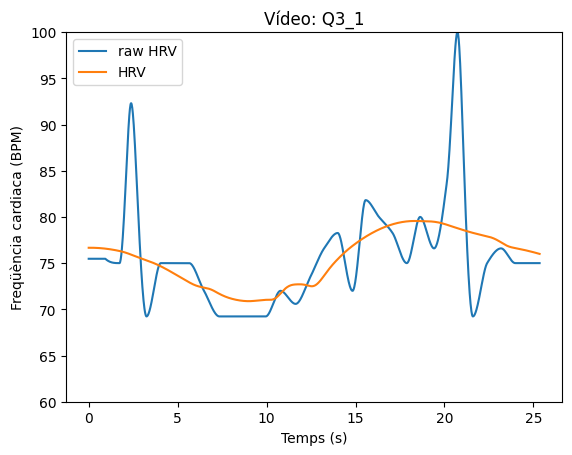

Video: Q3_2 | Valence: 2, Arousal: 1


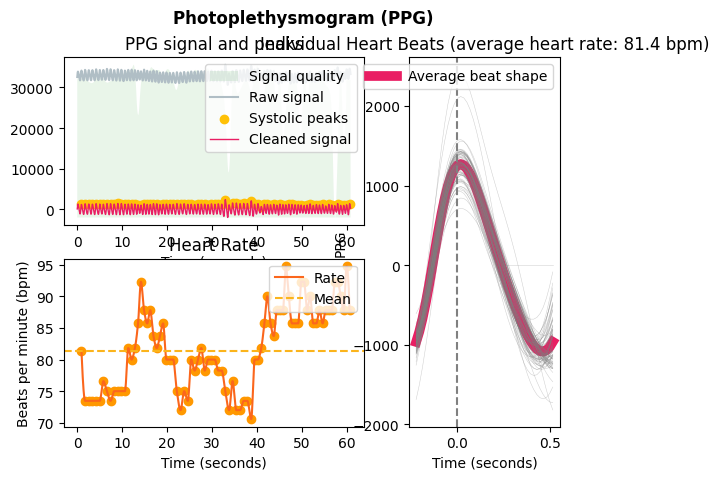

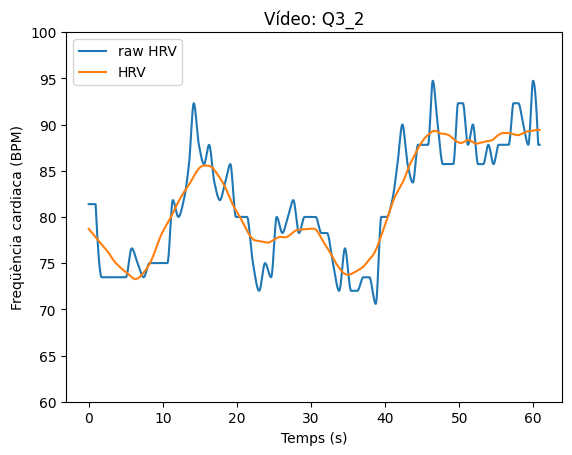

Video: Q4_1 | Valence: -2, Arousal: 2


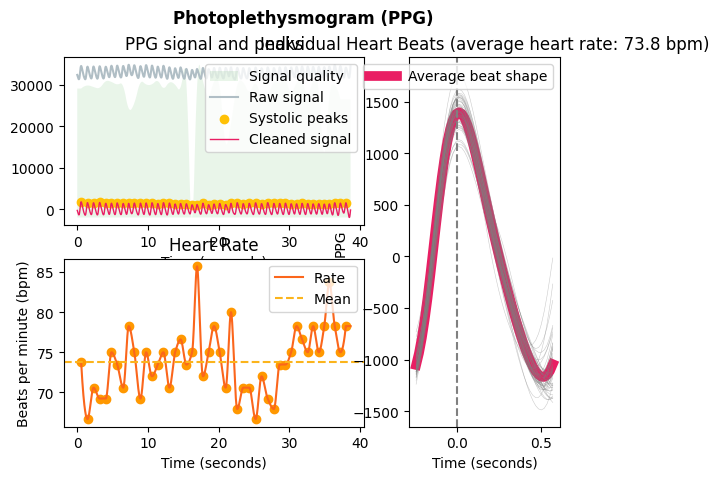

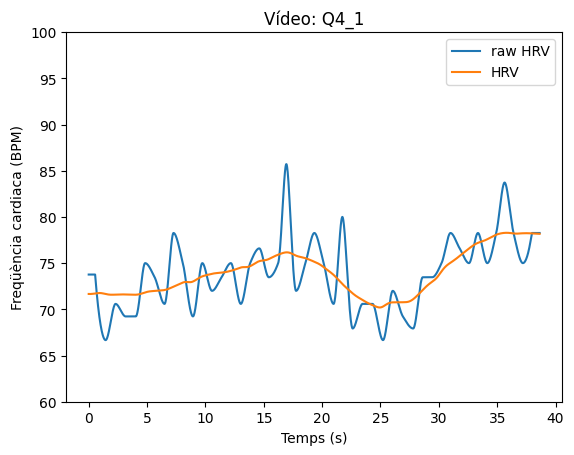

Video: Q4_2 | Valence: -2, Arousal: 1


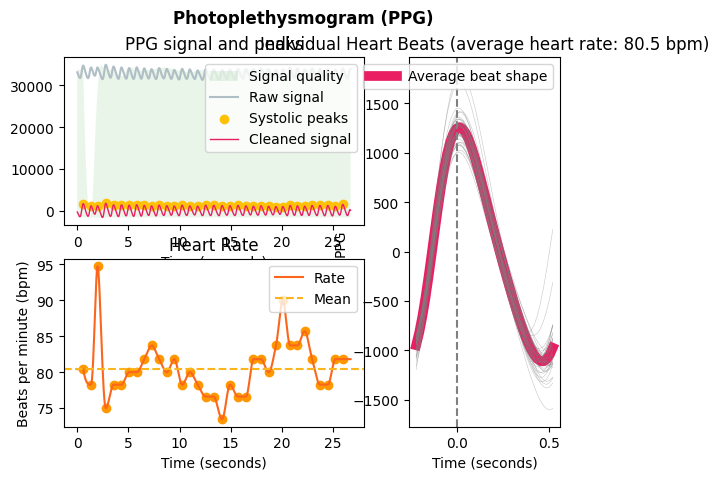

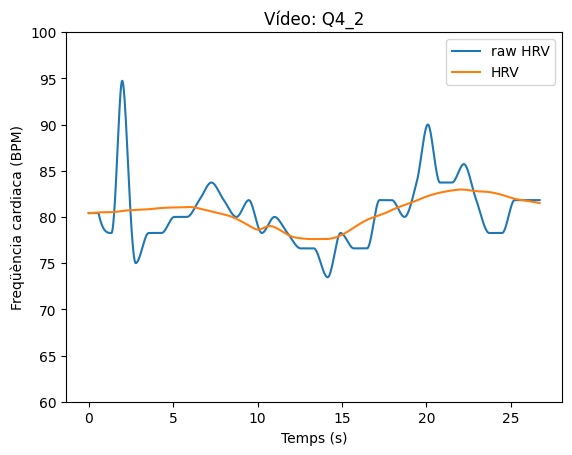

Video: Q5_1 | Valence: 0, Arousal: -2


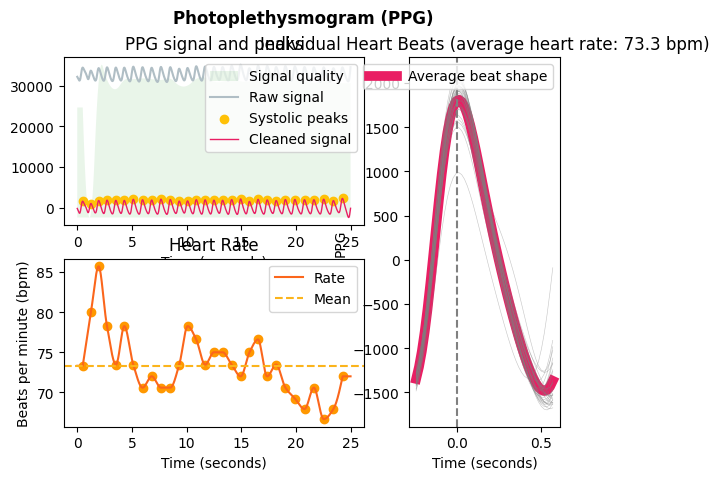

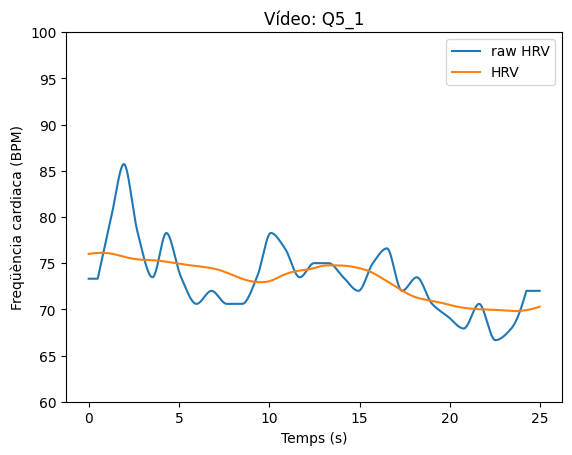

Video: Q5_2 | Valence: 0, Arousal: 0


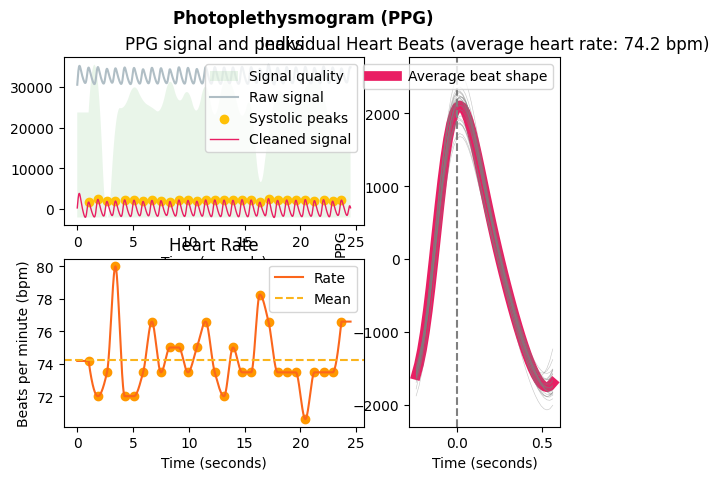

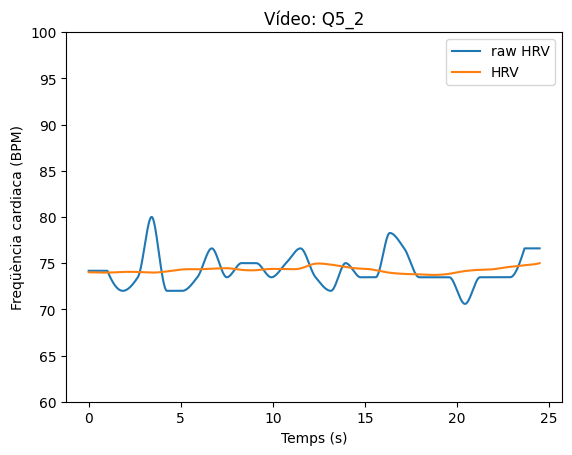

Video: Q6_1 | Valence: 1, Arousal: -1


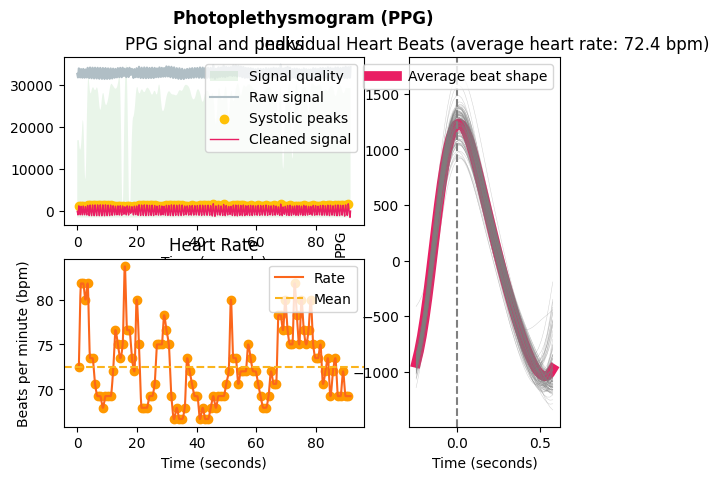

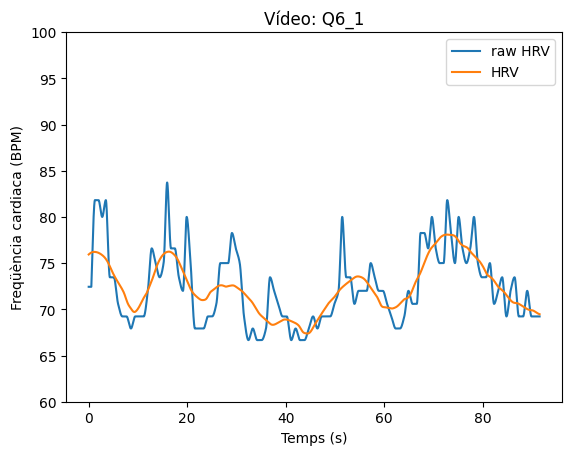

Video: Q6_2 | Valence: 1, Arousal: 0


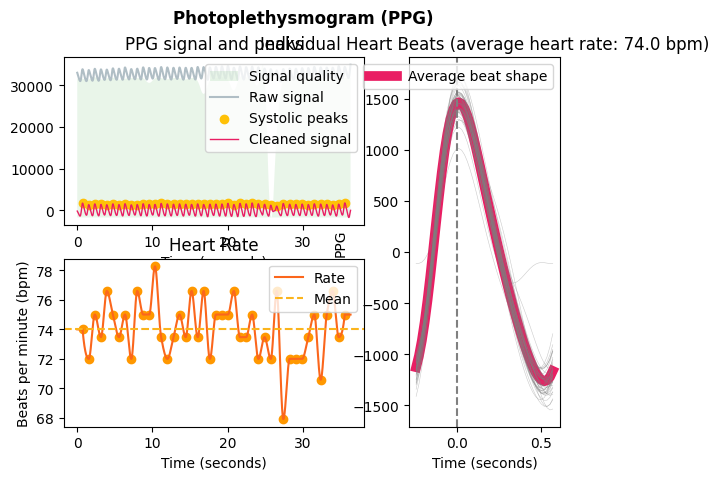

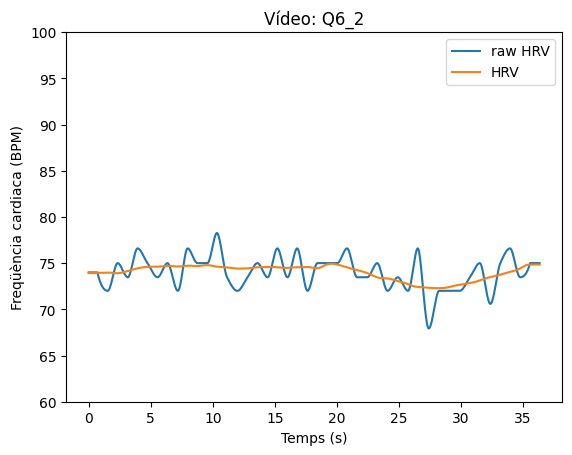

Video: Q7_1 | Valence: -2, Arousal: -1


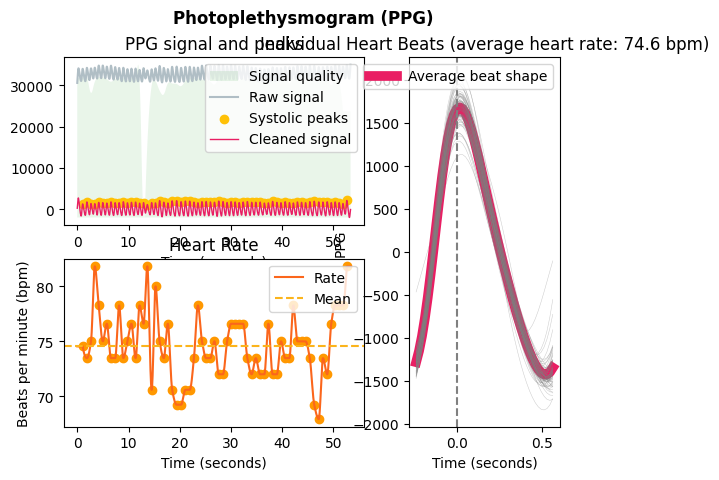

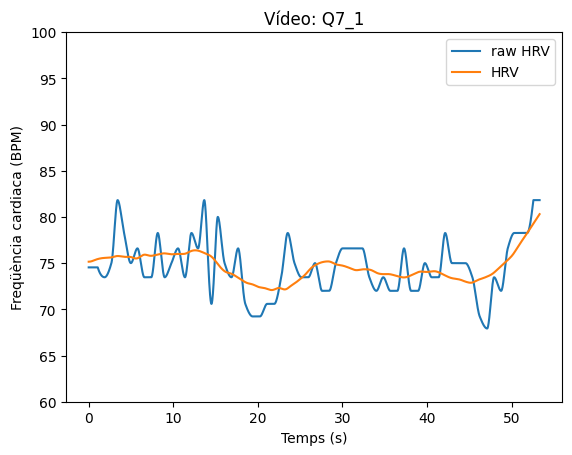

Video: Q7_2 | Valence: -2, Arousal: 0


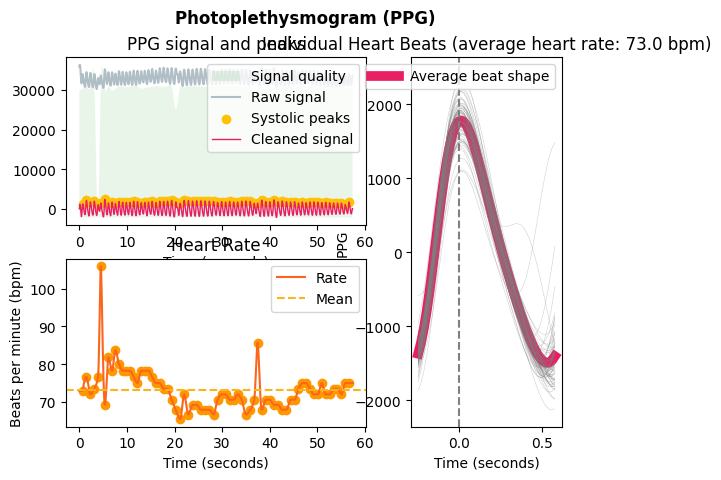

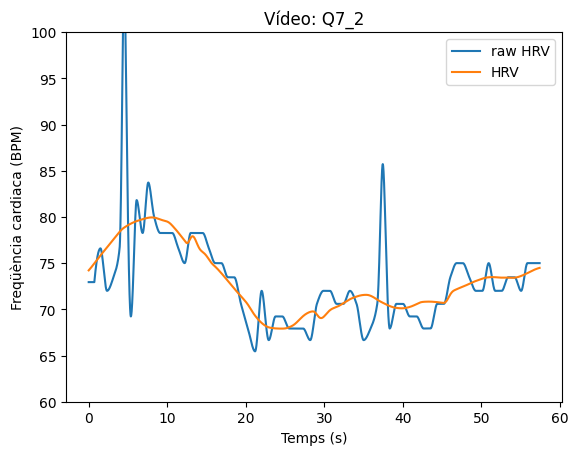

Video: Q8_1 | Valence: 0, Arousal: 0


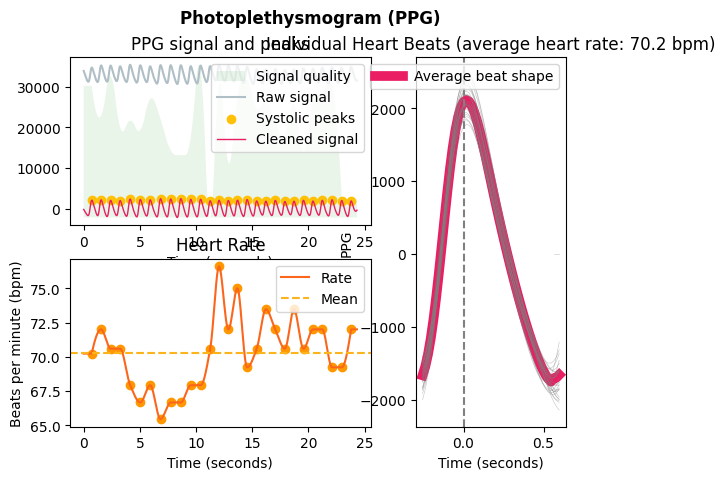

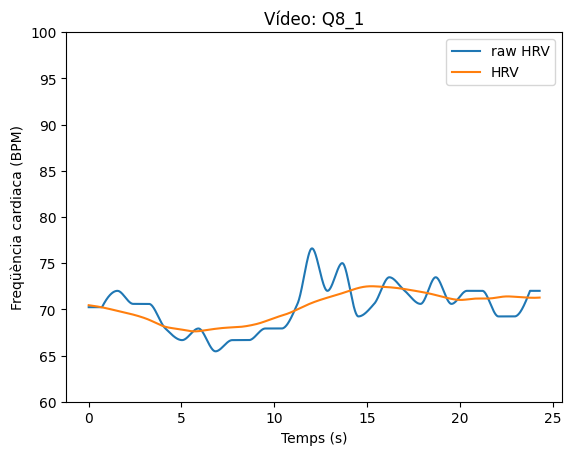

Video: Q8_2 | Valence: 0, Arousal: -2


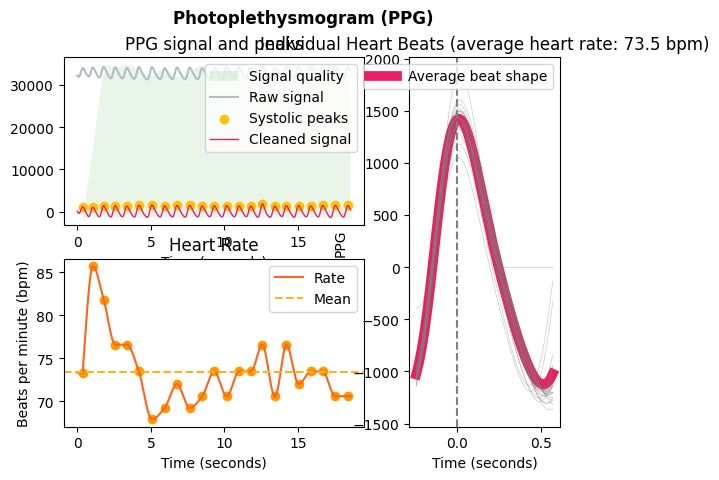

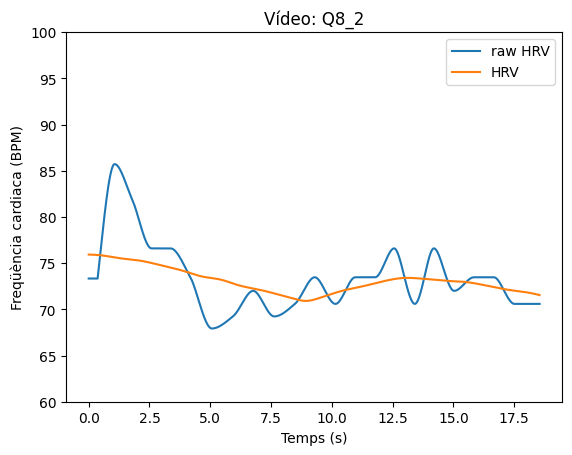

Video: Q9_1 | Valence: 2, Arousal: -2


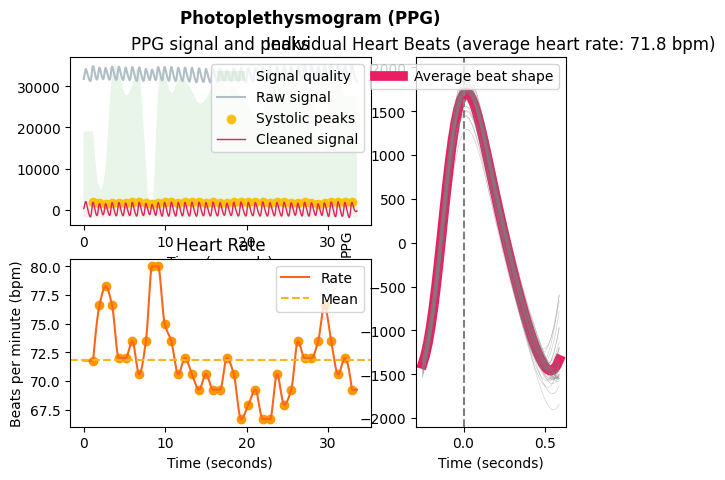

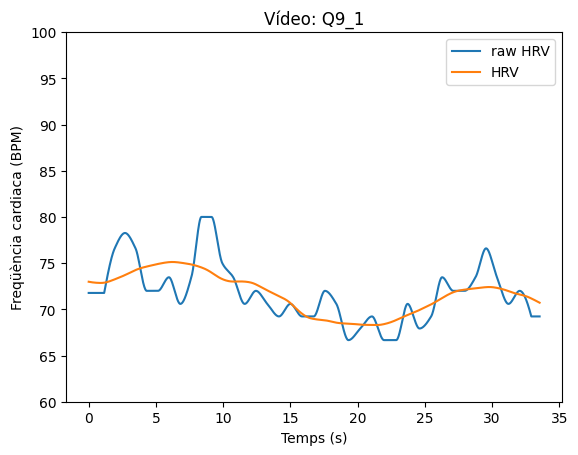

Video: Q9_2 | Valence: 2, Arousal: -2


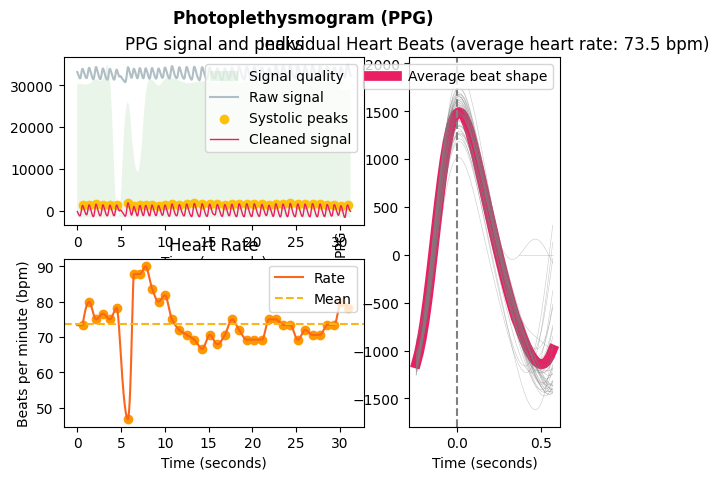

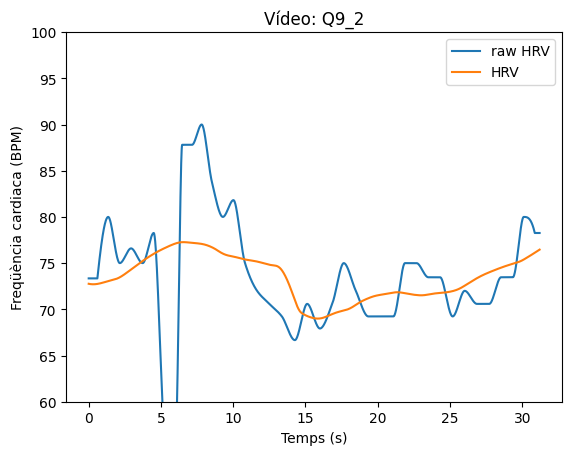

In [45]:
import neurokit2 as nk
import heartpy as hp
import pandas as pd
from pathlib import Path
from glob import glob
from matplotlib import pyplot as plt
import numpy as np
from scipy.signal import savgol_filter

## Path
castphys_folder = Path("E:/castphys_60")
ids = [int(x.split('_')[1]) for x in glob("Patient_*", root_dir=castphys_folder)]
ids = [id for id in ids if id != 5]
id = 32
list_videos = glob("Q*", root_dir=str(castphys_folder / f"Patient_{ids[0]}"))
v_name = 'Q1_2'

## params
fs = 60.0

for v_name in list_videos:
    video_folder = castphys_folder / f"Patient_{id}" / v_name
    df = pd.read_csv(video_folder / "annotations.csv", header=None)
    va = np.array([int(float(v)) for [c,v] in df.values if c in ['valence','arousal']])

    print(f"Video: {v_name} | Valence: {va[0]}, Arousal: {va[1]}")

    ## load ppg
    df = pd.read_csv(video_folder / 'bio.csv')
    ppg = df['ppg'].values
    #ppg = nk.ppg_simulate(duration=23, sampling_rate=fs, heart_rate=75)

    ## process PPG
    ppg_nabian = nk.ppg_clean(ppg, method='nabian2018')
    signals, info = nk.ppg_process(ppg_nabian, sampling_rate=fs)

    nk.ppg_plot(signals, info)
    plt.show()

    peaks = info['PPG_Peaks']
    ppg_rate = signals['PPG_Rate']

    #n = 100
    #window = np.ones(n) / n
    #hrv_smooth = np.convolve(ppg_rate, window, mode='same')
    n = 1000
    polyorder = 3 
    hrv_smooth = savgol_filter(ppg_rate, n, polyorder, mode='nearest')

    ## plot
    fig, ax = plt.subplots()
    ax.plot(np.array(range(len(ppg_rate)))/fs,ppg_rate, label="raw HRV")
    ax.plot(np.array(range(len(hrv_smooth)))/fs,hrv_smooth, label="HRV")
    ax.set_ylim([60,100])
    ax.set_title(f"Vídeo: {v_name}")
    ax.set_xlabel("Temps (s)")
    ax.set_ylabel("Freqüència cardiaca (BPM)")
    plt.legend()
    plt.show()

Video: Q1_1 | Valence: -2, Arousal: 1


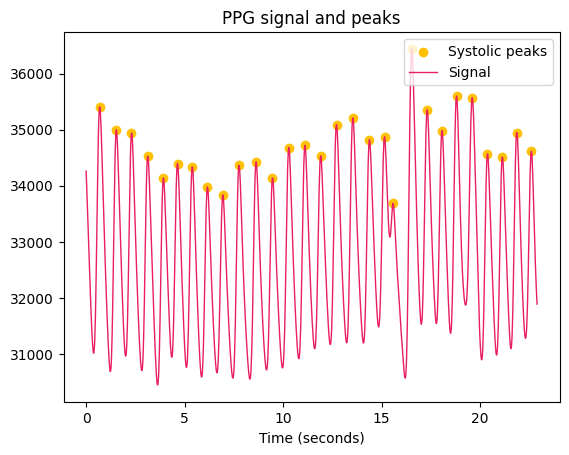

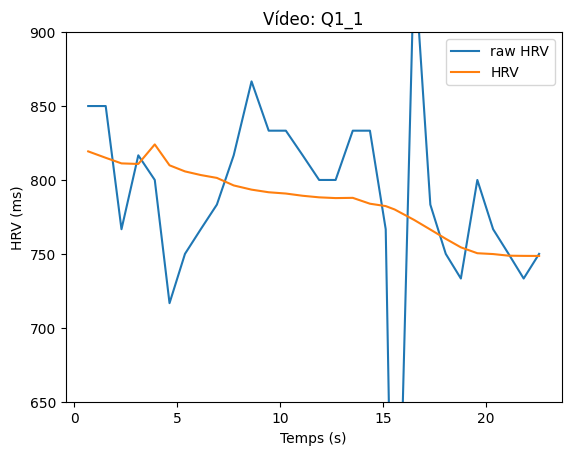

Video: Q1_2 | Valence: -2, Arousal: 2


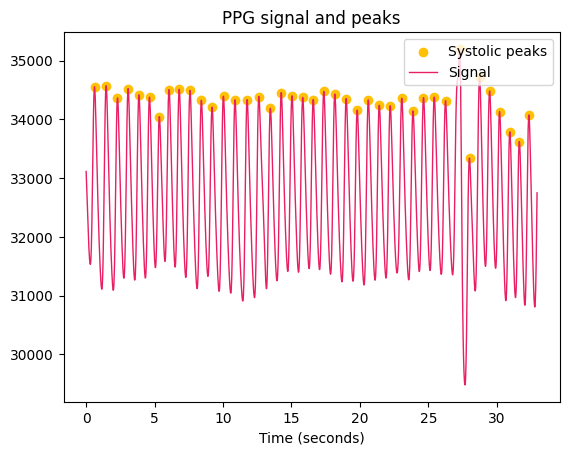

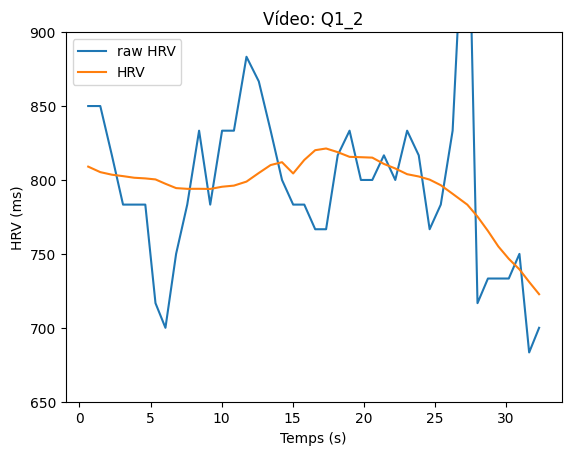

Video: Q2_1 | Valence: 1, Arousal: 1


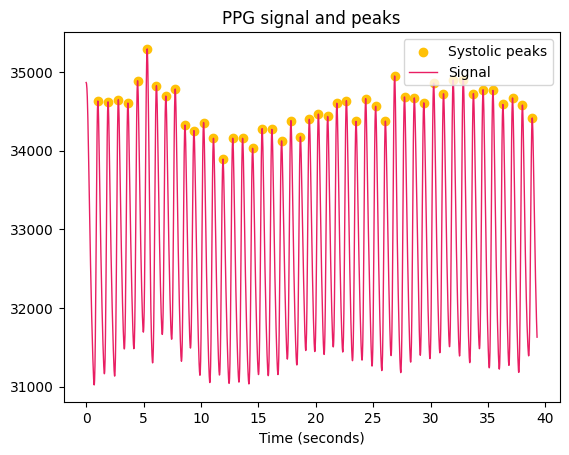

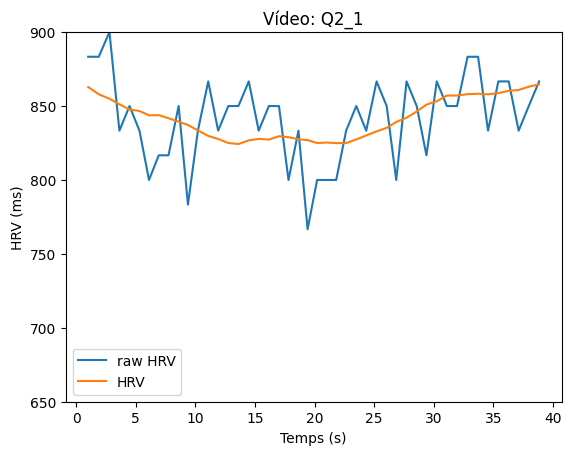

Video: Q2_2 | Valence: -1, Arousal: 2


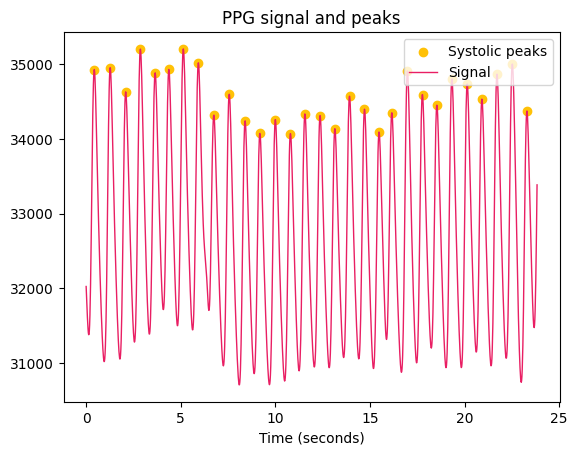

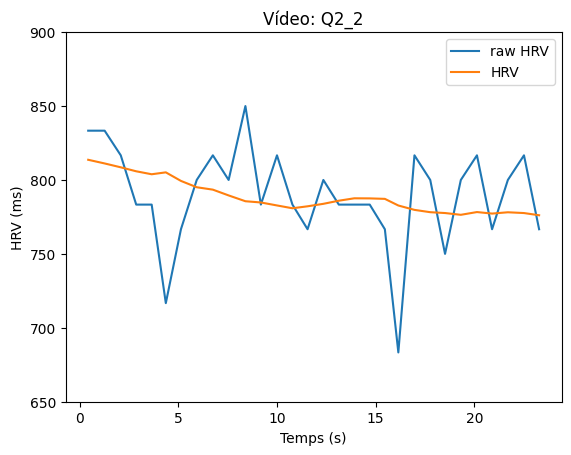

Video: Q3_1 | Valence: 1, Arousal: 0


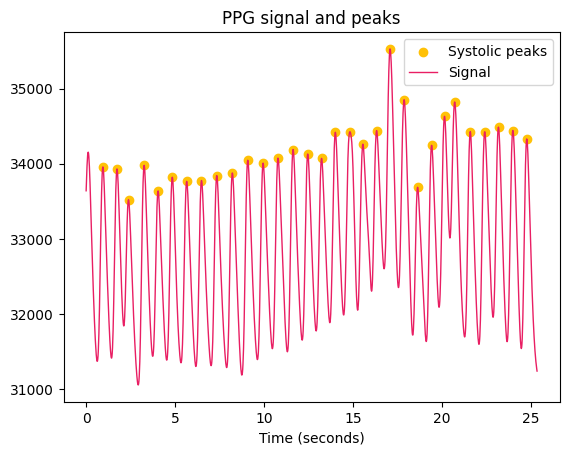

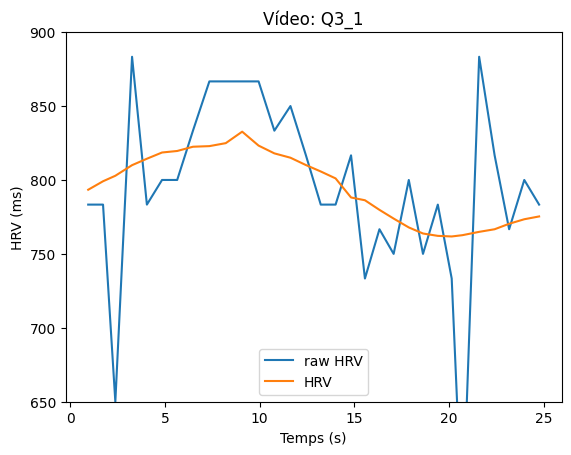

Video: Q3_2 | Valence: 2, Arousal: 1


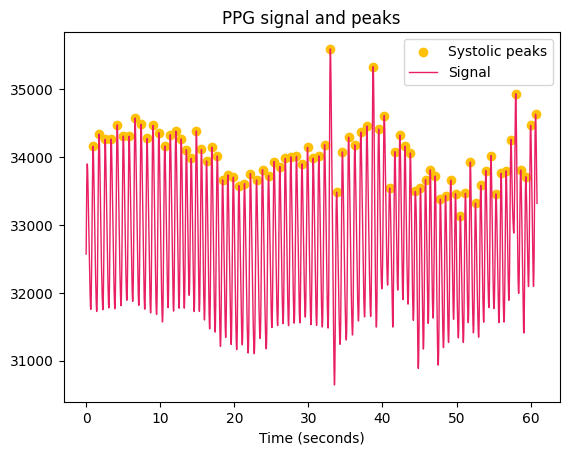

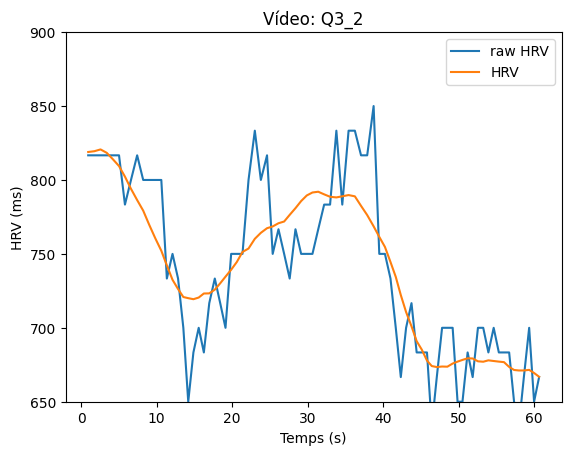

Video: Q4_1 | Valence: -2, Arousal: 2


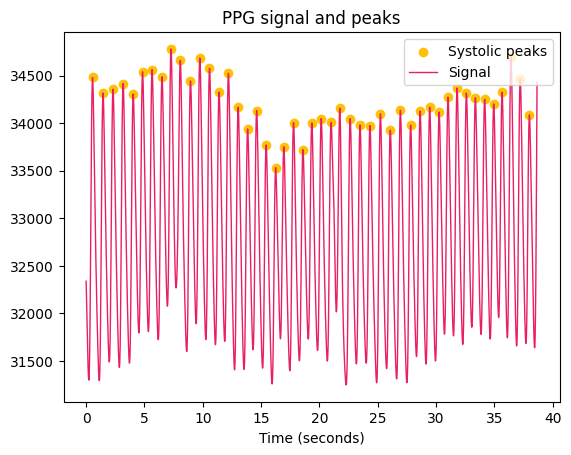

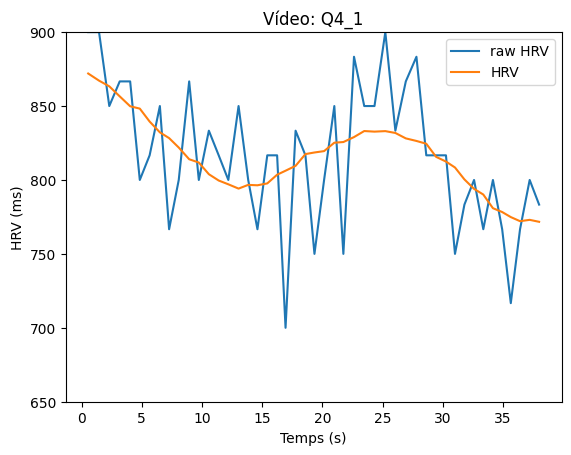

Video: Q4_2 | Valence: -2, Arousal: 1


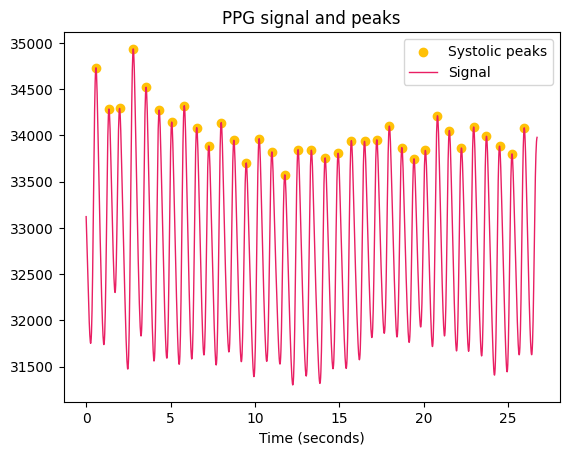

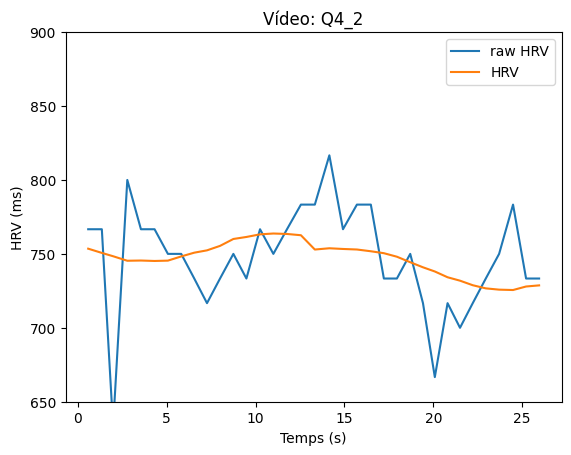

Video: Q5_1 | Valence: 0, Arousal: -2


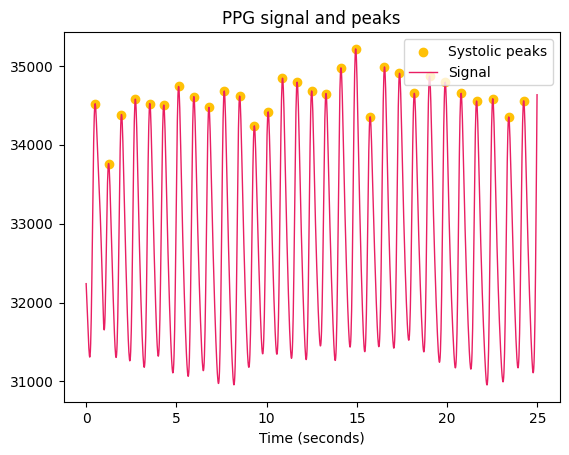

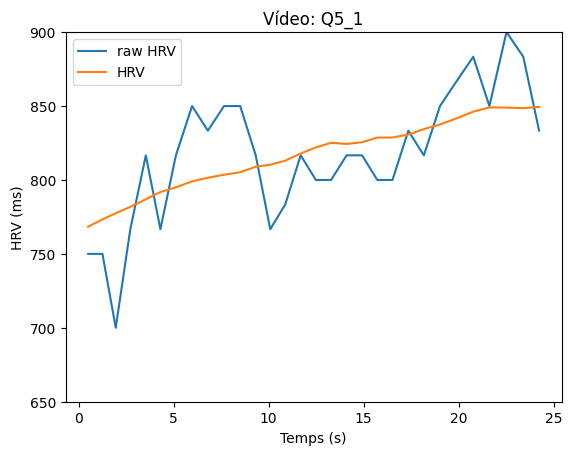

Video: Q5_2 | Valence: 0, Arousal: 0


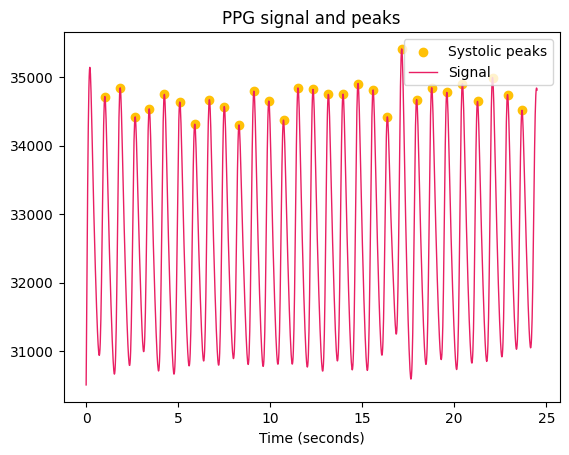

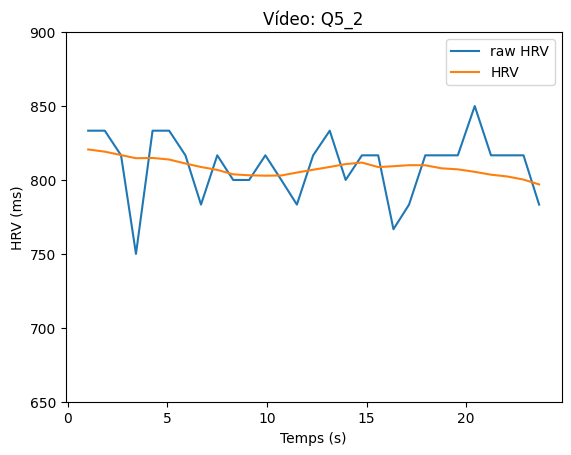

Video: Q6_1 | Valence: 1, Arousal: -1


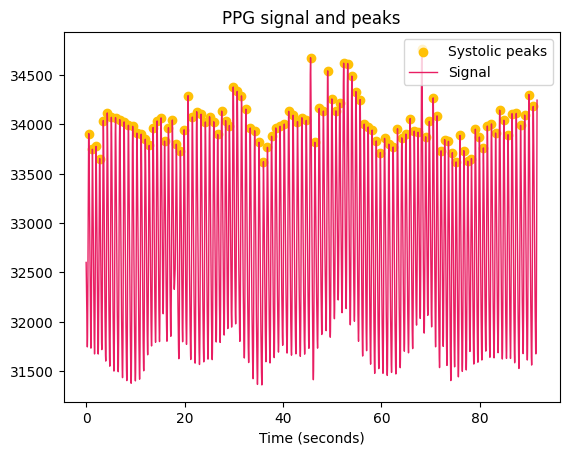

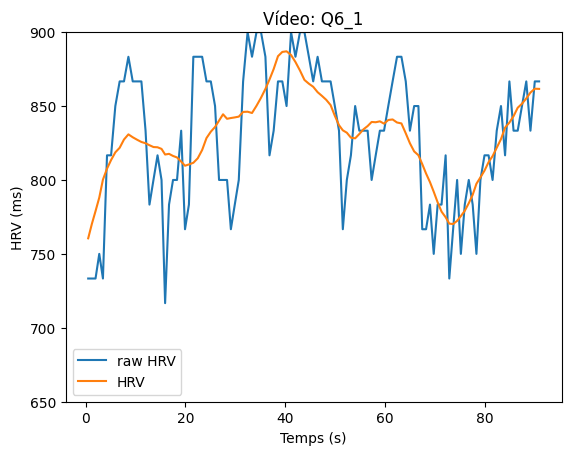

Video: Q6_2 | Valence: 1, Arousal: 0


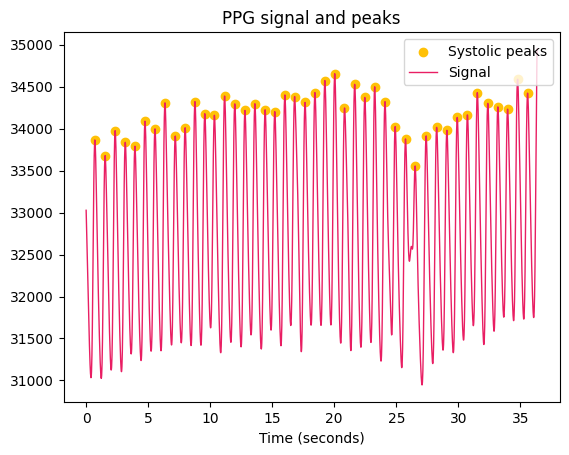

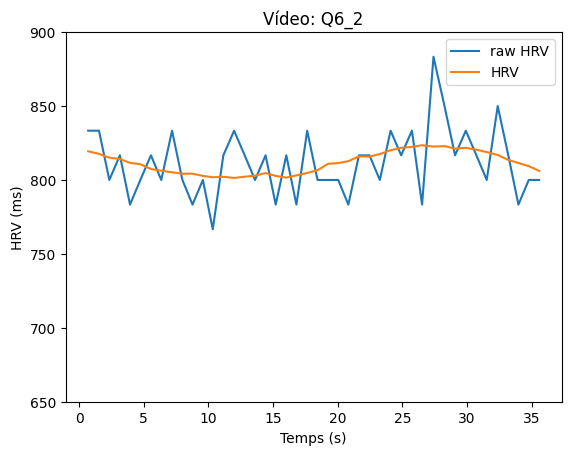

Video: Q7_1 | Valence: -2, Arousal: -1


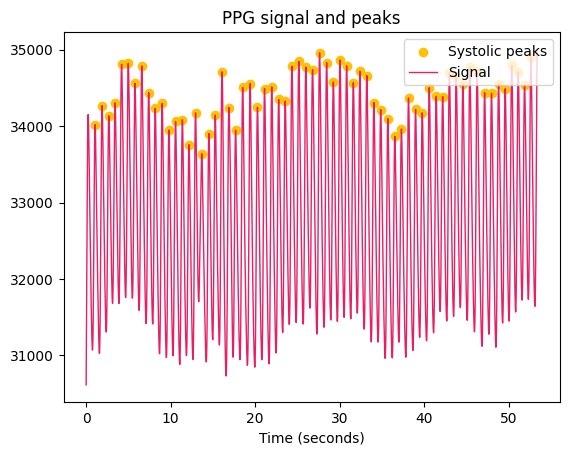

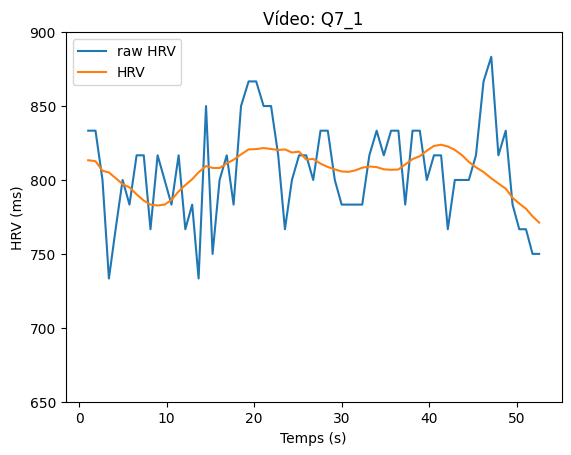

Video: Q7_2 | Valence: -2, Arousal: 0


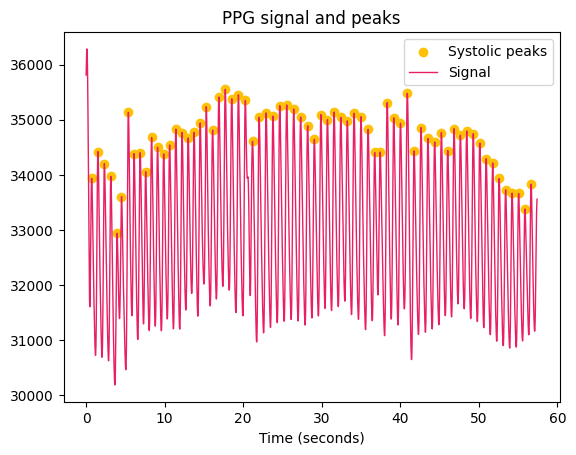

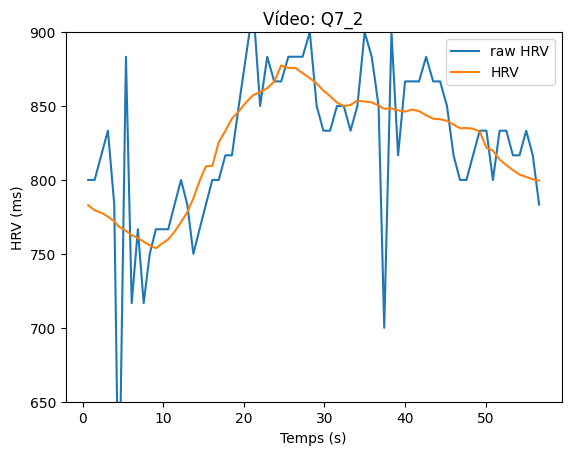

Video: Q8_1 | Valence: 0, Arousal: 0


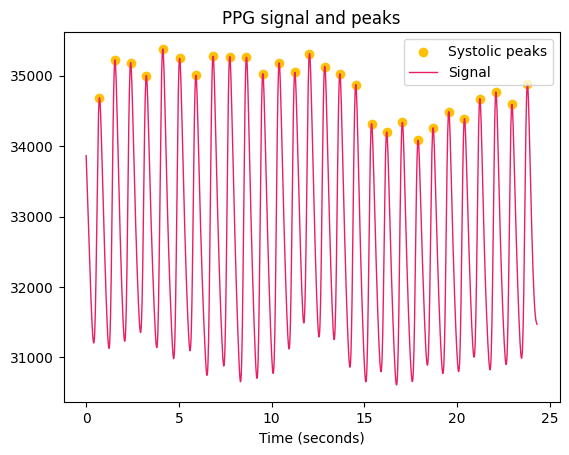

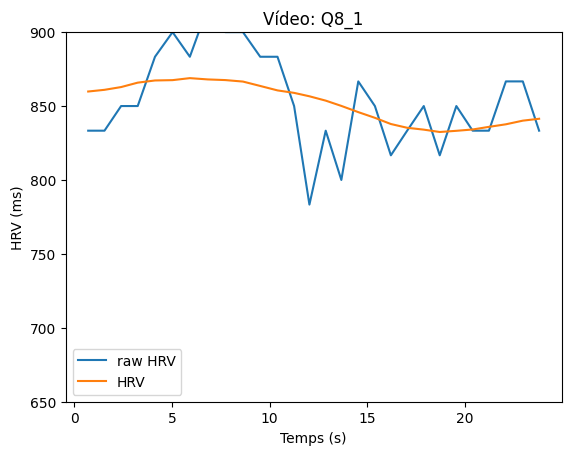

Video: Q8_2 | Valence: 0, Arousal: -2


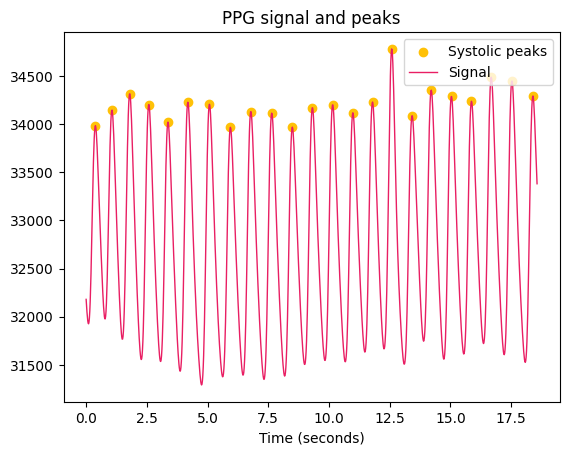

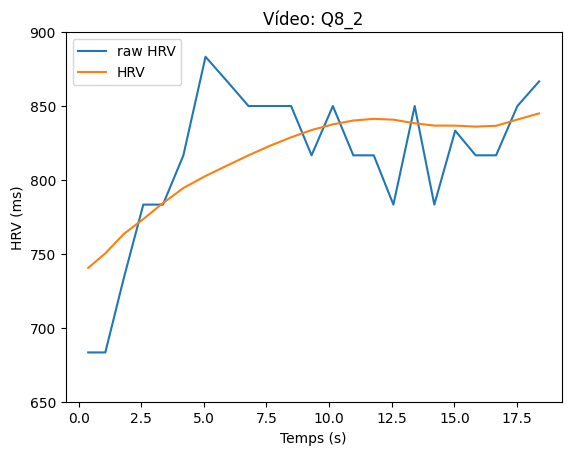

Video: Q9_1 | Valence: 2, Arousal: -2


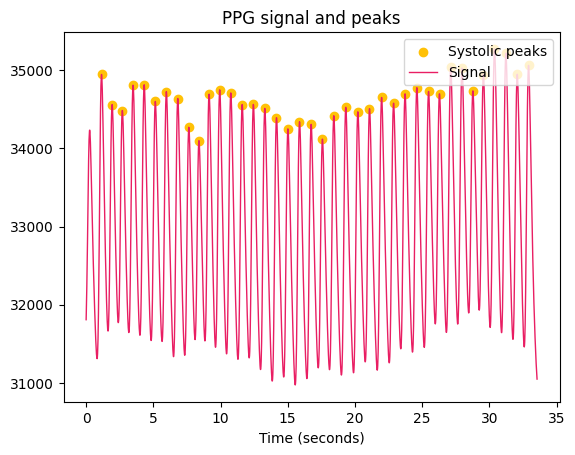

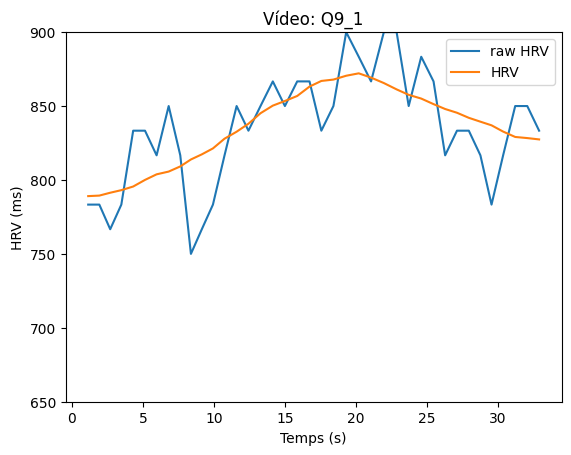

Video: Q9_2 | Valence: 2, Arousal: -2


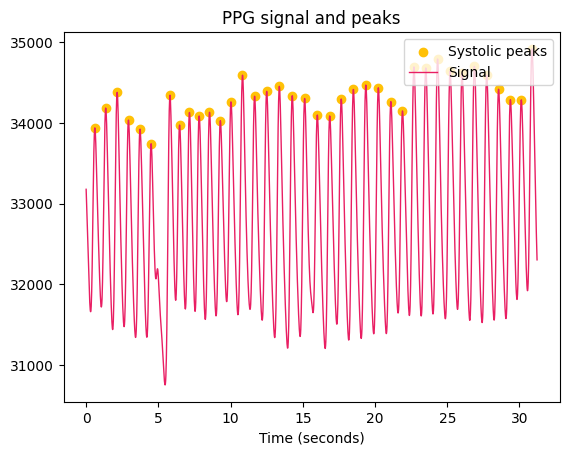

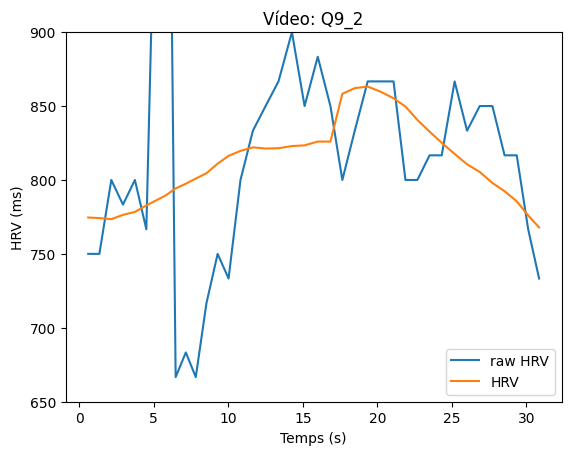

In [33]:
import neurokit2 as nk
import heartpy as hp
import pandas as pd
from pathlib import Path
from glob import glob
from matplotlib import pyplot as plt
import numpy as np
from scipy.signal import savgol_filter

## Path
castphys_folder = Path("E:/castphys_60")
ids = [int(x.split('_')[1]) for x in glob("Patient_*", root_dir=castphys_folder)]
ids = [id for id in ids if id != 5]
id = 32
list_videos = glob("Q*", root_dir=str(castphys_folder / f"Patient_{ids[0]}"))
v_name = 'Q1_2'

## params
fs = 60.0

for v_name in list_videos:
    video_folder = castphys_folder / f"Patient_{id}" / v_name
    df = pd.read_csv(video_folder / "annotations.csv", header=None)
    va = np.array([int(float(v)) for [c,v] in df.values if c in ['valence','arousal']])

    print(f"Video: {v_name} | Valence: {va[0]}, Arousal: {va[1]}")

    ## load ppg
    df = pd.read_csv(video_folder / 'bio.csv')
    ppg = df['ppg'].values
    #ppg = nk.ppg_simulate(duration=23, sampling_rate=fs, heart_rate=75)

    ## process PPG
    ppg_nabian = nk.ppg_clean(ppg, method='nabian2018')

    # Default method (Elgendi et al., 2013)
    peaks, info = nk.ppg_peaks(ppg_nabian, sampling_rate=fs, method="elgendi", show=True)
    ppg_peaks = info["PPG_Peaks"]

    hrv = [(ppg_peaks[i+1]-ppg_peaks[i])/fs*1000 for i in range(len(ppg_peaks)-1)]
    hrv = [hrv[0]]+hrv

    n = 30
    polyorder = 3 
    hrv_smooth = savgol_filter(hrv, n, polyorder, mode='nearest')

    fig, ax = plt.subplots()
    ax.plot(ppg_peaks/fs,hrv, label='raw HRV')
    ax.plot(ppg_peaks/fs,hrv_smooth, label='HRV')
    ax.set_title(f"Vídeo: {v_name}")
    ax.set_xlabel("Temps (s)")
    ax.set_ylabel("HRV (ms)")
    ax.set_ylim([650,900])
    plt.legend()
    plt.show()
    

#hrv = nk.hrv_time(peaks, sampling_rate=fs, show=True)
#hrv

#hrv_welch = nk.hrv_frequency(peaks, sampling_rate=fs, show=True, psd_method="welch")
#hrv_welch

